In [1]:
#-*- coding: utf-8 -*- 

# 代码7-1

# 对数据进行基本的探索
# 返回缺失值个数以及最大最小值

import pandas as pd

datafile= '../data/air_data.csv'  # 航空原始数据,第一行为属性标签
resultfile = '../tmp/explore.csv'  # 数据探索结果表

# 读取原始数据，指定UTF-8编码（需要用文本编辑器将数据装换为UTF-8编码）
data = pd.read_csv(datafile, encoding = 'utf-8')

# 包括对数据的基本描述，percentiles参数是指定计算多少的分位数表（如1/4分位数、中位数等）
explore = data.describe(percentiles = [], include = 'all').T  # T是转置，转置后更方便查阅
explore['null'] = len(data)-explore['count']  # describe()函数自动计算非空值数，需要手动计算空值数

explore = explore[['null', 'max', 'min']]
explore.columns = ['空值数', '最大值', '最小值']  # 表头重命名
'''
这里只选取部分探索结果。
describe()函数自动计算的字段有count（非空值数）、unique（唯一值数）、top（频数最高者）、
freq（最高频数）、mean（平均值）、std（方差）、min（最小值）、50%（中位数）、max（最大值）
'''

explore.to_csv(resultfile)  # 导出结果


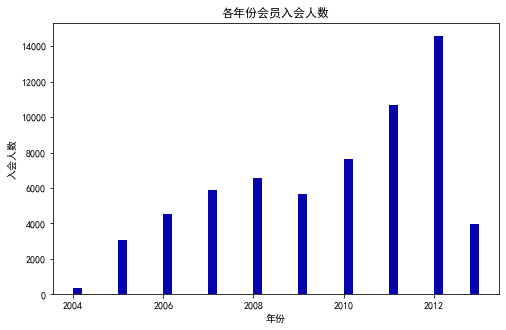

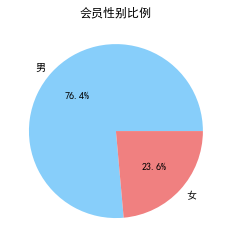

<function matplotlib.pyplot.close(fig=None)>

In [4]:
#-*- coding: utf-8 -*- 

# 代码7-2

# 对数据的分布分析

import pandas as pd
import matplotlib.pyplot as plt 

datafile= '../data/air_data.csv'  # 航空原始数据,第一行为属性标签

# 读取原始数据，指定UTF-8编码（需要用文本编辑器将数据装换为UTF-8编码）
data = pd.read_csv(datafile, encoding = 'utf-8')

# 客户信息类别
# 提取会员入会年份
from datetime import datetime
ffp = data['FFP_DATE'].apply(lambda x:datetime.strptime(x,'%Y/%m/%d'))
ffp_year = ffp.map(lambda x : x.year)
# 绘制各年份会员入会人数直方图
fig = plt.figure(figsize = (8 ,5))  # 设置画布大小
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.hist(ffp_year, bins='auto', color='#0504aa')
plt.xlabel('年份')
plt.ylabel('入会人数')
plt.title('各年份会员入会人数')
plt.show()
plt.close

# 提取会员不同性别人数
male = pd.value_counts(data['GENDER'])['男']
female = pd.value_counts(data['GENDER'])['女']
# 绘制会员性别比例饼图
fig = plt.figure(figsize = (7 ,4))  # 设置画布大小
plt.pie([ male, female], labels=['男','女'], colors=['lightskyblue', 'lightcoral'],
       autopct='%1.1f%%')
plt.title('会员性别比例')
plt.show()
plt.close

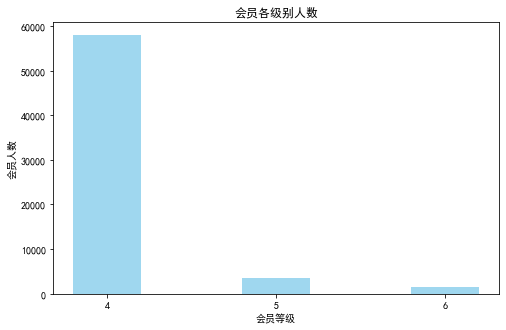

In [6]:
# 提取不同级别会员的人数
lv_four = pd.value_counts(data['FFP_TIER'])[4]
lv_five = pd.value_counts(data['FFP_TIER'])[5]
lv_six = pd.value_counts(data['FFP_TIER'])[6]
# 绘制会员各级别人数条形图
fig = plt.figure(figsize = (8 ,5))  # 设置画布大小
plt.bar(x=range(3), height=[lv_four,lv_five,lv_six], width=0.4, alpha=0.8, color='skyblue')
plt.xticks([index for index in range(3)], ['4','5','6'])
plt.xlabel('会员等级')
plt.ylabel('会员人数')
plt.title('会员各级别人数')
plt.show()
plt.close()

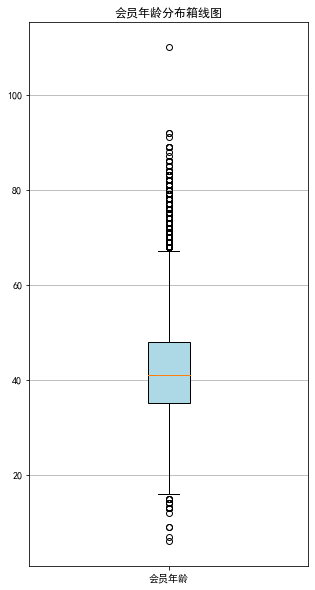

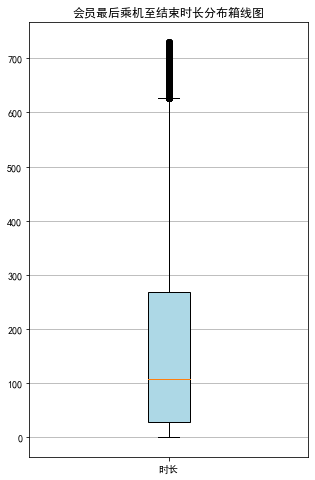

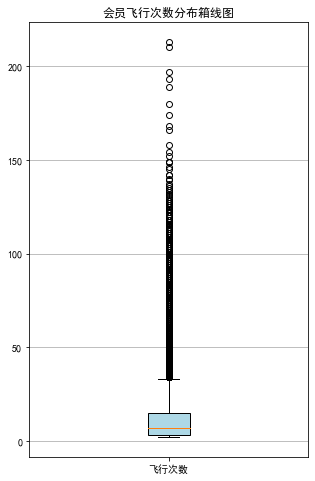

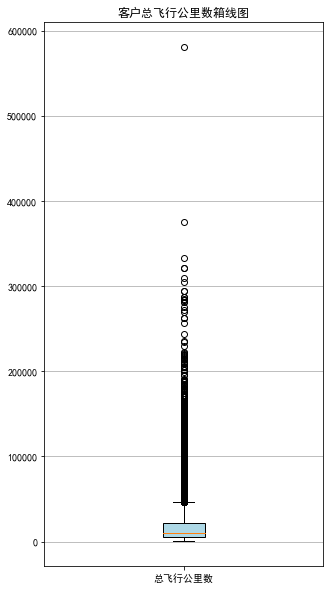

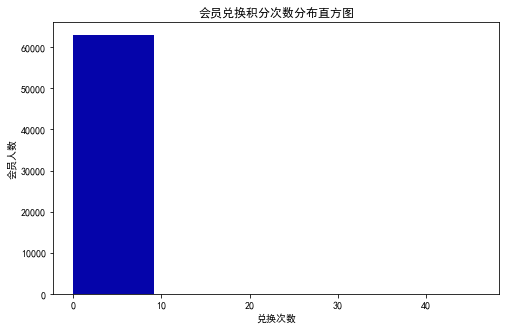

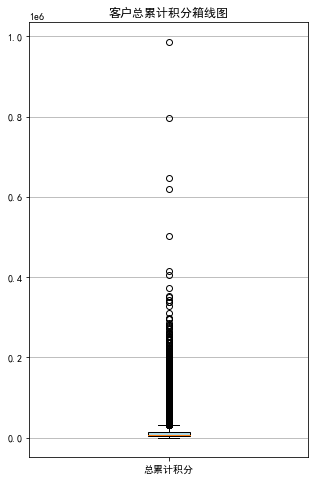

C:\Users\rosehyr\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\rosehyr\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


相关性矩阵为：
                 FFP_TIER  FLIGHT_COUNT  LAST_TO_END  SEG_KM_SUM  \
FFP_TIER        1.000000      0.582447    -0.206313    0.522350   
FLIGHT_COUNT    0.582447      1.000000    -0.404999    0.850411   
LAST_TO_END    -0.206313     -0.404999     1.000000   -0.369509   
SEG_KM_SUM      0.522350      0.850411    -0.369509    1.000000   
EXCHANGE_COUNT  0.342355      0.502501    -0.169717    0.507819   
Points_Sum      0.559249      0.747092    -0.292027    0.853014   
AGE             0.076245      0.075309    -0.027654    0.087285   
ffp_year       -0.116510     -0.188181     0.117913   -0.171508   

                EXCHANGE_COUNT  Points_Sum       AGE  ffp_year  
FFP_TIER              0.342355    0.559249  0.076245 -0.116510  
FLIGHT_COUNT          0.502501    0.747092  0.075309 -0.188181  
LAST_TO_END          -0.169717   -0.292027 -0.027654  0.117913  
SEG_KM_SUM            0.507819    0.853014  0.087285 -0.171508  
EXCHANGE_COUNT        1.000000    0.578581  0.032760 -0.216610

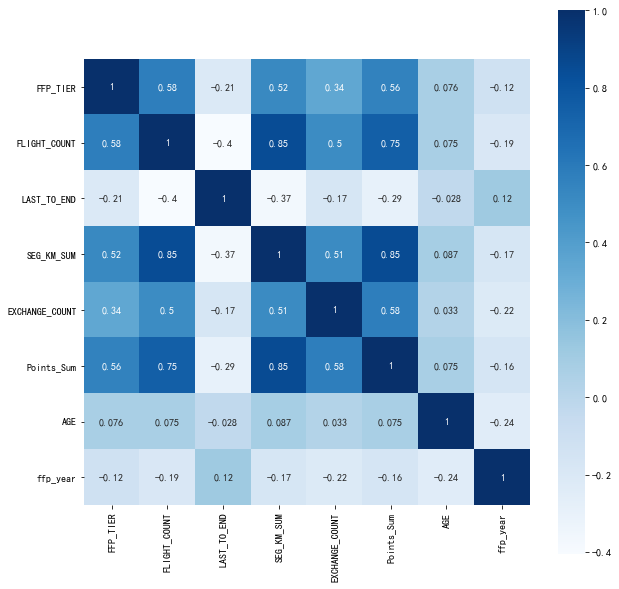

<function matplotlib.pyplot.close(fig=None)>

In [7]:
# 提取会员年龄
age = data['AGE'].dropna()
age = age.astype('int64')
# 绘制会员年龄分布箱型图
fig = plt.figure(figsize = (5 ,10))
plt.boxplot(age, 
            patch_artist=True,
            labels = ['会员年龄'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员年龄分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close



# 代码7-3

# 乘机信息类别
lte = data['LAST_TO_END']
fc = data['FLIGHT_COUNT']
sks = data['SEG_KM_SUM']

# 绘制最后乘机至结束时长箱线图
fig = plt.figure(figsize = (5 ,8))
plt.boxplot(lte, 
            patch_artist=True,
            labels = ['时长'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员最后乘机至结束时长分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close

# 绘制客户飞行次数箱线图
fig = plt.figure(figsize = (5 ,8))
plt.boxplot(fc, 
            patch_artist=True,
            labels = ['飞行次数'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员飞行次数分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close

# 绘制客户总飞行公里数箱线图
fig = plt.figure(figsize = (5 ,10))
plt.boxplot(sks, 
            patch_artist=True,
            labels = ['总飞行公里数'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('客户总飞行公里数箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close



# 代码7-4

# 积分信息类别
# 提取会员积分兑换次数
ec = data['EXCHANGE_COUNT']
# 绘制会员兑换积分次数直方图
fig = plt.figure(figsize = (8 ,5))  # 设置画布大小
plt.hist(ec, bins=5, color='#0504aa')
plt.xlabel('兑换次数')
plt.ylabel('会员人数')
plt.title('会员兑换积分次数分布直方图')
plt.show()
plt.close

# 提取会员总累计积分
ps = data['Points_Sum']
# 绘制会员总累计积分箱线图
fig = plt.figure(figsize = (5 ,8))
plt.boxplot(ps, 
            patch_artist=True,
            labels = ['总累计积分'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('客户总累计积分箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
plt.close



# 代码7-5

# 提取属性并合并为新数据集
data_corr = data[['FFP_TIER','FLIGHT_COUNT','LAST_TO_END',
                  'SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum']]
age1 = data['AGE'].fillna(0)
data_corr['AGE'] = age1.astype('int64')
data_corr['ffp_year'] = ffp_year

# 计算相关性矩阵
dt_corr = data_corr.corr(method = 'pearson')
print('相关性矩阵为：\n',dt_corr)

# 绘制热力图
import seaborn as sns
plt.subplots(figsize=(10, 10)) # 设置画面大小 
sns.heatmap(dt_corr, annot=True, vmax=1, square=True, cmap='Blues') 
plt.show()
plt.close



In [8]:
#-*- coding: utf-8 -*- 

# 代码7-6

# 处理缺失值与异常值

import numpy as np
import pandas as pd

datafile = '../data/air_data.csv'  # 航空原始数据路径
cleanedfile = '../tmp/data_cleaned.csv'  # 数据清洗后保存的文件路径

# 读取数据
airline_data = pd.read_csv(datafile,encoding = 'utf-8')
print('原始数据的形状为：',airline_data.shape)

# 去除票价为空的记录
airline_notnull = airline_data.loc[airline_data['SUM_YR_1'].notnull() & 
                                   airline_data['SUM_YR_2'].notnull(),:]
print('删除缺失记录后数据的形状为：',airline_notnull.shape)

# 只保留票价非零的，或者平均折扣率不为0且总飞行公里数大于0的记录。
index1 = airline_notnull['SUM_YR_1'] != 0
index2 = airline_notnull['SUM_YR_2'] != 0
index3 = (airline_notnull['SEG_KM_SUM']> 0) & (airline_notnull['avg_discount'] != 0)
index4 = airline_notnull['AGE'] > 100  # 去除年龄大于100的记录
airline = airline_notnull[(index1 | index2) & index3 & ~index4]
print('数据清洗后数据的形状为：',airline.shape)

airline.to_csv(cleanedfile)  # 保存清洗后的数据


原始数据的形状为： (62988, 44)
删除缺失记录后数据的形状为： (62299, 44)
数据清洗后数据的形状为： (62043, 44)


In [9]:
#-*- coding: utf-8 -*- 

# 代码7-7

# 属性选择、构造与数据标准化

import pandas as pd
import numpy as np

# 读取数据清洗后的数据
cleanedfile = '../tmp/data_cleaned.csv'  # 数据清洗后保存的文件路径
airline = pd.read_csv(cleanedfile, encoding = 'utf-8')
# 选取需求属性
airline_selection = airline[['FFP_DATE','LOAD_TIME','LAST_TO_END',
                                     'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
print('筛选的属性前5行为：\n',airline_selection.head())



# 代码7-8

# 构造属性L
L = pd.to_datetime(airline_selection['LOAD_TIME']) - \
pd.to_datetime(airline_selection['FFP_DATE'])
L = L.astype('str').str.split().str[0]
L = L.astype('int')/30

# 合并属性
airline_features = pd.concat([L,airline_selection.iloc[:,2:]],axis = 1)
airline_features.columns = ['L','R','F','M','C']
print('构建的LRFMC属性前5行为：\n',airline_features.head())

# 数据标准化
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(airline_features)
np.savez('../tmp/airline_scale.npz',data)
print('标准化后LRFMC五个属性为：\n',data[:5,:])

筛选的属性前5行为：
     FFP_DATE  LOAD_TIME  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
0  2006/11/2  2014/3/31            1           210      580717      0.961639
1  2007/2/19  2014/3/31            7           140      293678      1.252314
2   2007/2/1  2014/3/31           11           135      283712      1.254676
3  2008/8/22  2014/3/31           97            23      281336      1.090870
4  2009/4/10  2014/3/31            5           152      309928      0.970658
构建的LRFMC属性前5行为：
            L   R    F       M         C
0  90.200000   1  210  580717  0.961639
1  86.566667   7  140  293678  1.252314
2  87.166667  11  135  283712  1.254676
3  68.233333  97   23  281336  1.090870
4  60.533333   5  152  309928  0.970658
标准化后LRFMC五个属性为：
 [[ 1.43579256 -0.94493902 14.03402401 26.76115699  1.29554188]
 [ 1.30723219 -0.91188564  9.07321595 13.12686436  2.86817777]
 [ 1.32846234 -0.88985006  8.71887252 12.65348144  2.88095186]
 [ 0.65853304 -0.41608504  0.78157962 12.54062193  1.99471546]


In [38]:
#-*- coding: utf-8 -*- 

# 代码7-9

# K-means聚类

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans  # 导入kmeans算法

# 读取标准化后的数据
airline_scale = np.load('../tmp/airline_scale.npz')['arr_0']
k = 5  # 确定聚类中心数

# 构建模型，随机种子设为123
kmeans_model = KMeans(n_clusters = k,n_jobs=4,random_state=123)
fit_kmeans = kmeans_model.fit(airline_scale)  # 模型训练

# 查看聚类结果
kmeans_cc = kmeans_model.cluster_centers_  # 聚类中心
print('各类聚类中心为：\n',kmeans_cc)
kmeans_labels = kmeans_model.labels_  # 样本的类别标签
print('各样本的类别标签为：\n',kmeans_labels)
r1 = pd.Series(kmeans_model.labels_).value_counts()  # 统计不同类别样本的数目
print('最终每个类别的数目为：\n',r1)
# 输出聚类分群的结果
cluster_center = pd.DataFrame(kmeans_model.cluster_centers_,\
             columns = ['ZL','ZR','ZF','ZM','ZC'])   # 将聚类中心放在数据框中
cluster_center.index = pd.DataFrame(kmeans_model.labels_ ).\
                  drop_duplicates().iloc[:,0]  # 将样本类别作为数据框索引
print(cluster_center)


C:\Users\rosehyr\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


各类聚类中心为：
 [[ 1.16108399e+00 -3.77499994e-01 -8.65189669e-02 -9.44338125e-02
  -1.57047742e-01]
 [ 4.30744744e-02 -1.70312626e-03 -2.32695277e-01 -2.36587633e-01
   2.17138891e+00]
 [-7.00326044e-01 -4.15377753e-01 -1.60648047e-01 -1.60390485e-01
  -2.57380124e-01]
 [ 4.83304628e-01 -7.99421213e-01  2.48303869e+00  2.42388525e+00
   3.10034088e-01]
 [-3.13136330e-01  1.68641023e+00 -5.73859336e-01 -5.36663736e-01
  -1.75973079e-01]]
各样本的类别标签为：
 [3 3 3 ... 2 4 4]
最终每个类别的数目为：
 2    24617
0    15727
4    12115
3     5337
1     4247
dtype: int64
         ZL        ZR        ZF        ZM        ZC
0                                                  
3  1.161084 -0.377500 -0.086519 -0.094434 -0.157048
1  0.043074 -0.001703 -0.232695 -0.236588  2.171389
0 -0.700326 -0.415378 -0.160648 -0.160390 -0.257380
2  0.483305 -0.799421  2.483039  2.423885  0.310034
4 -0.313136  1.686410 -0.573859 -0.536664 -0.175973


In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#标签
labels = np.array(['ZL','ZR','ZF','ZM','ZC'])
legen = ['客户群' + str(i + 1) for i in cluster_center.index]  # 客户群命名，作为雷达图的图例
lstype = ['-','--',(0, (3, 5, 1, 5, 1, 5)),':','-.']
kinds = list(cluster_center.iloc[:, 0])
# 由于雷达图要保证数据闭合，因此再添加L列，并转换为 np.ndarray
cluster_center = pd.concat([cluster_center, cluster_center[['ZL']]], axis=1)
centers = np.array(cluster_center.iloc[:, 0:])

In [48]:
# 分割圆周长，并让其闭合
n = len(labels)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))
labels=np.concatenate((labels,[labels[0]]))   #对labels进行封闭

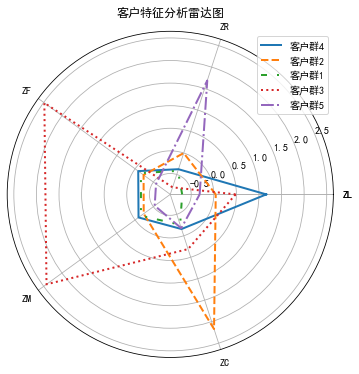

<function matplotlib.pyplot.close(fig=None)>

In [50]:
# 绘图
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, polar=True)  # 以极坐标的形式绘制图形
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号 
# 画线
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linestyle=lstype[i], linewidth=2, label=kinds[i])
# 添加属性标签
ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title('客户特征分析雷达图')
plt.legend(legen)
plt.show()
plt.close